In [2]:
import requests
data = {
    'BOROUGH CODE': 3,
    'GROUPED CATEGORY': 'Apartment',
    'GROSS SQUARE FEET': 2000,
    'LAND SQUARE FEET': 1000,
    'LATITUDE': 40.6727,
    'LONGITUDE': -73.9650
}

response = requests.post('http://localhost:8080/predict', json=data)

print(response.text)

{
  "prediction_price": 2540973
}




  0%|                                                   | 0/952 [00:06<?, ?it/s]

 62%|█████████████████████████▎               | 587/952 [00:21<00:12, 29.04it/s]


100%|█████████████████████████████████████████| 952/952 [00:33<00:00, 28.04it/s]


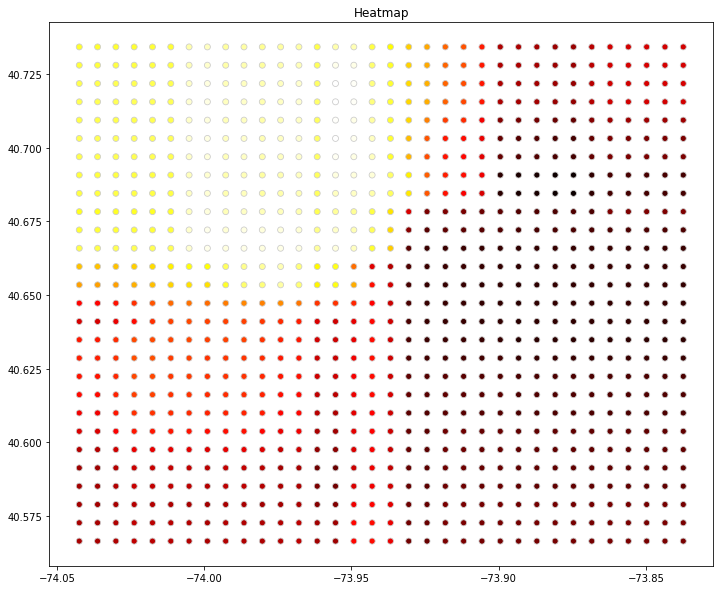

In [11]:
import requests
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from tqdm import tqdm

# Distance in degrees
dist = 0.00621371

# Define boundaries
min_lat, max_lat = 40.566454, 40.739339
min_lon, max_lon = -74.042411, -73.833242

# Generate grid points
lats = np.arange(min_lat, max_lat, dist)
lons = np.arange(min_lon, max_lon, dist)

# Prepare data for heatmap
heatmap_data = []

# Initialize progress bar
pbar = tqdm(total=len(lats) * len(lons))

for lat in lats:
    for lon in lons:
        # API call
        data = {
            'BOROUGH CODE': 3,
            'GROUPED CATEGORY': 'Apartment',
            'GROSS SQUARE FEET': 2000,
            'LAND SQUARE FEET': 1000,
            'LATITUDE': lat,
            'LONGITUDE': lon
        }

        response = requests.post('http://localhost:8080/predict', json=data)
        response_data = response.json()  # assuming API returns JSON

        # For this example, I'm assuming the response data contains a 'prediction' field
        prediction = response_data['prediction_price']
        heatmap_data.append((lat, lon, prediction))

        # Update progress bar
        pbar.update(1)

# Close progress bar
pbar.close()

# Convert data to GeoDataFrame
gdf = gpd.GeoDataFrame(heatmap_data, columns=['lat', 'lon', 'value'])
gdf['geometry'] = gdf.apply(lambda row: Point(row['lon'], row['lat']), axis=1)

# Create the plot
fig, ax = plt.subplots(1, figsize=(12, 10))
plt.title('Heatmap')
gdf.plot(column='value', cmap='hot', linewidth=0.8, ax=ax, edgecolor='0.8')
plt.show()



  0%|                                                   | 0/952 [01:07<?, ?it/s]

 61%|████████████████████████▉                | 579/952 [00:20<00:13, 28.33it/s]


100%|█████████████████████████████████████████| 952/952 [00:34<00:00, 27.73it/s]


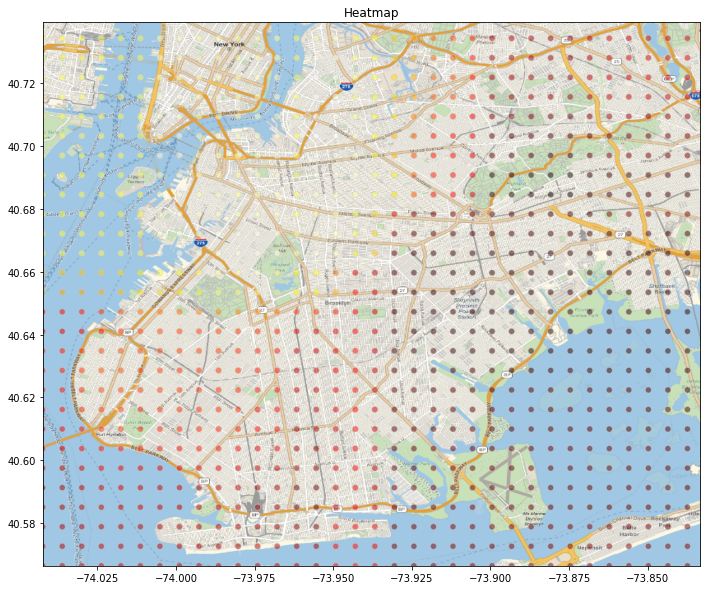

In [20]:
import requests
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from tqdm import tqdm
import matplotlib.image as mpimg

# Distance in degrees
dist = 0.00621371

# Define boundaries
min_lat, max_lat = 40.566454, 40.739339
min_lon, max_lon = -74.042411, -73.833242

# Generate grid points
lats = np.arange(min_lat, max_lat, dist)
lons = np.arange(min_lon, max_lon, dist)

# Prepare data for heatmap
heatmap_data = []

# Initialize progress bar
pbar = tqdm(total=len(lats) * len(lons))

for lat in lats:
    for lon in lons:
        # API call
        data = {
            'BOROUGH CODE': 3,
            'GROUPED CATEGORY': 'Apartment',
            'GROSS SQUARE FEET': 2000,
            'LAND SQUARE FEET': 1000,
            'LATITUDE': lat,
            'LONGITUDE': lon
        }

        response = requests.post('http://localhost:8080/predict', json=data)
        response_data = response.json()  # assuming API returns JSON

        # For this example, I'm assuming the response data contains a 'prediction' field
        prediction = response_data['prediction_price']
        heatmap_data.append((lat, lon, prediction))

        # Update progress bar
        pbar.update(1)

# Close progress bar
pbar.close()

# Convert data to GeoDataFrame
gdf = gpd.GeoDataFrame(heatmap_data, columns=['lat', 'lon', 'value'])
gdf['geometry'] = gdf.apply(lambda row: Point(row['lon'], row['lat']), axis=1)

# Read the basemap image
nyc_map = mpimg.imread('/Users/jackzellweger/Documents/GitHub/real-estate-predictor/project/\
nyc_map_brooklyn.png')

# Create the plot
fig, ax = plt.subplots(1, figsize=(12, 10))

# Display the image as basemap
ax.imshow(nyc_map, extent=[min_lon, max_lon, min_lat, max_lat])

plt.title('Heatmap')
gdf.plot(column='value', cmap='hot', linewidth=0.8, ax=ax, edgecolor='0.8', alpha=0.5)
plt.show()


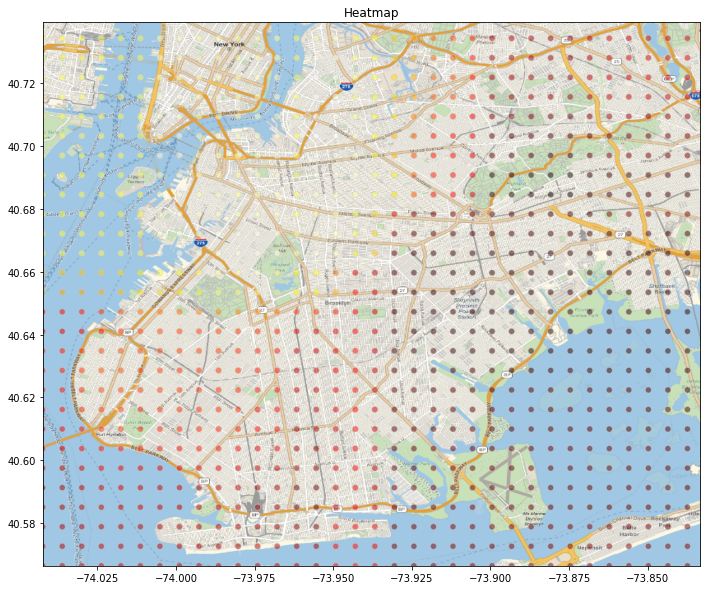

In [21]:
# Convert data to GeoDataFrame
gdf = gpd.GeoDataFrame(heatmap_data, columns=['lat', 'lon', 'value'])
gdf['geometry'] = gdf.apply(lambda row: Point(row['lon'], row['lat']), axis=1)

# Read the basemap image
nyc_map = mpimg.imread('/Users/jackzellweger/Documents/GitHub/real-estate-predictor/project/\
nyc_map_brooklyn.png')

# Create the plot
fig, ax = plt.subplots(1, figsize=(12, 10))

# Display the image as basemap
ax.imshow(nyc_map, extent=[min_lon, max_lon, min_lat, max_lat])

plt.title('Heatmap')
gdf.plot(column='value', cmap='hot', linewidth=0.8, ax=ax, edgecolor='0.8', alpha=0.5)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


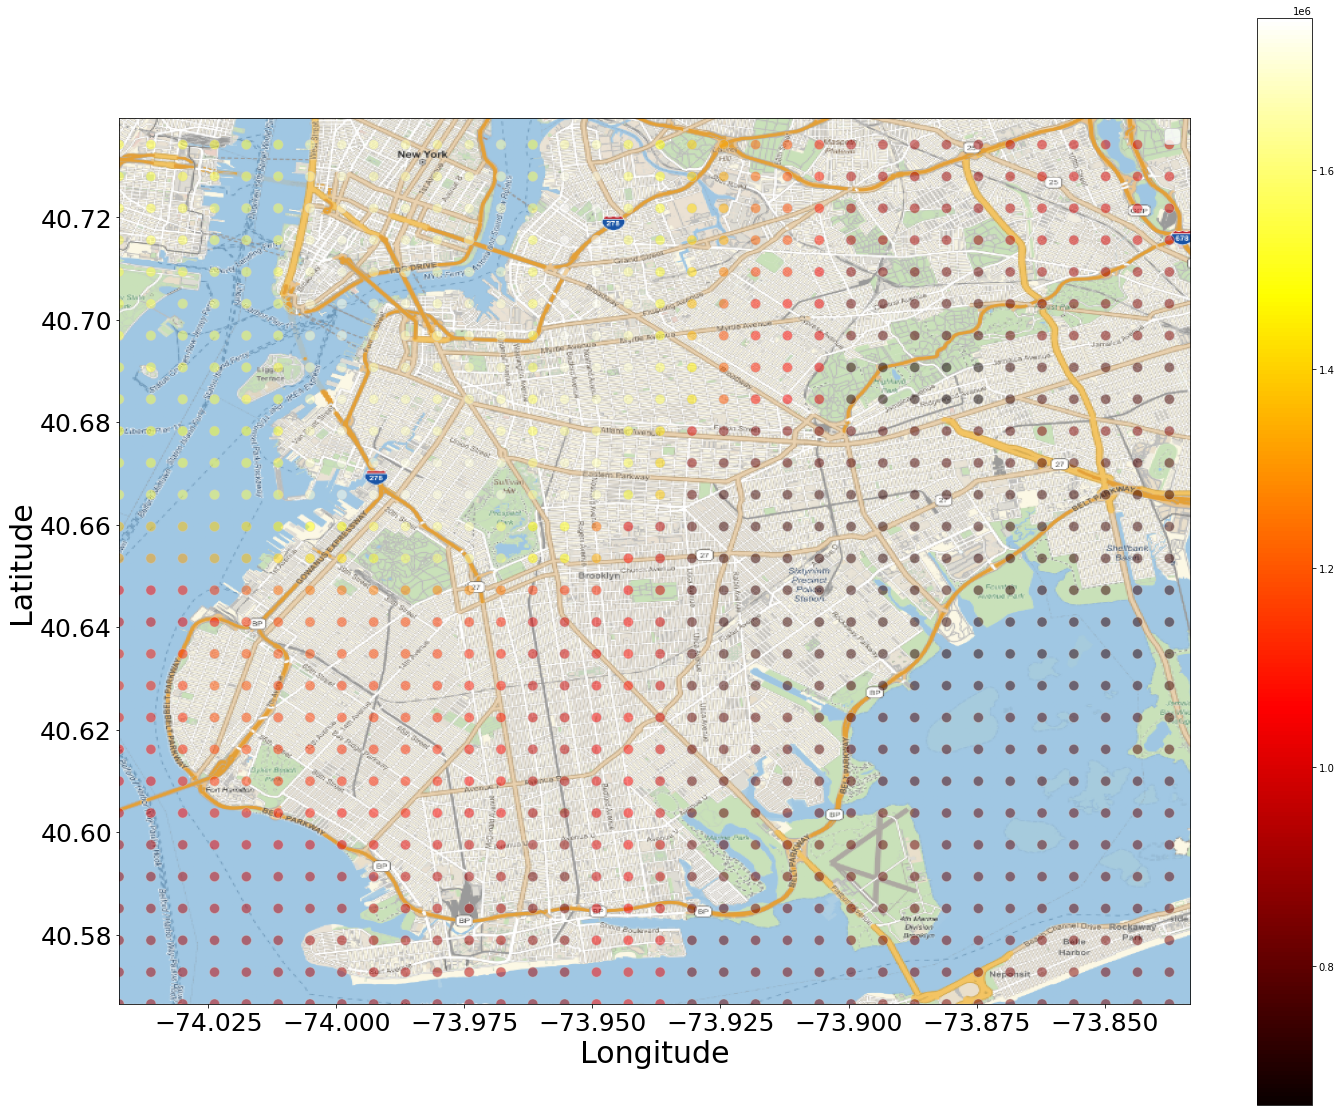

In [47]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import geopandas as gpd
from shapely.geometry import Point

# Convert data to GeoDataFrame
gdf = gpd.GeoDataFrame(heatmap_data, columns=['lat', 'lon', 'value'])
gdf['geometry'] = gdf.apply(lambda row: Point(row['lon'], row['lat']), axis=1)

# Read the basemap image
nyc_map = mpimg.imread('/Users/jackzellweger/Documents/GitHub/real-estate-predictor/project/nyc_map_brooklyn.png')

# Increase the figure size
fig, ax = plt.subplots(figsize=(24, 20))  # Adjust the dimensions as per your requirement

# Display the image as basemap
ax.imshow(nyc_map, extent=[min_lon, max_lon, min_lat, max_lat])

#plt.title('Heatmap', fontsize=50)  # Increase the font size of the title

# Plotting code with increased marker size
gdf.plot(column='value', cmap='hot', linewidth=0.8, ax=ax, edgecolor='0.8', alpha=0.5, markersize=100, legend=True)

# Increase the font size of the axes labels
plt.xlabel('Longitude', fontsize=30)
plt.ylabel('Latitude', fontsize=30)

# Increase the font size of the tick labels
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.legend(fontsize="20")

plt.show()


In [26]:
import csv

# heatmap_data

filename = "/Users/jackzellweger/Documents/GitHub/real-estate-predictor/project/heatmap_data.csv"  # Name of the CSV file

# Open the CSV file in write mode
with open(filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(heatmap_data)

print("CSV file exported successfully!")

CSV file exported successfully!
